## Продолжим?

In [1]:
from plotnine import *
from plotnine.data import *

import numpy as np
import pandas as pd

In [2]:
import warnings
pd.set_option("display.max_rows", 10)

from matplotlib import rcParams
rcParams.update({"figure.max_open_warning": 0,
                 "savefig.bbox": "tight"})

theme_set(theme_gray(base_size=12))

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## Начнём с простого, со всевозможных подписей: к графикам, к осям, к значениям. Подписи добавляются с использованием функции labs(). Вот, например, заголовок графика:

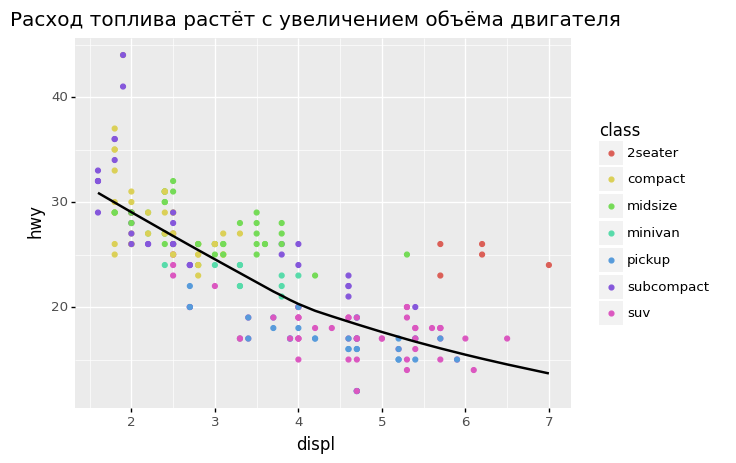

<ggplot: (-9223371851496821539)>

In [4]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
labs(title="Расход топлива растёт с увеличением объёма двигателя")

## Основной целью заголовка является обобщение основного результата наблюдения. Избегайте заголовков, которые просто описывают графики, например,  "Диаграмма зависимости расхода топлива от объёма двигателя".

## Также вы можете использовать labs() для задания названий осей и легенд. Как правило, хорошей идеей будет заменить формальные обозначения категорий на более развёрнутое их описание с указанием размерности (при необходимости).

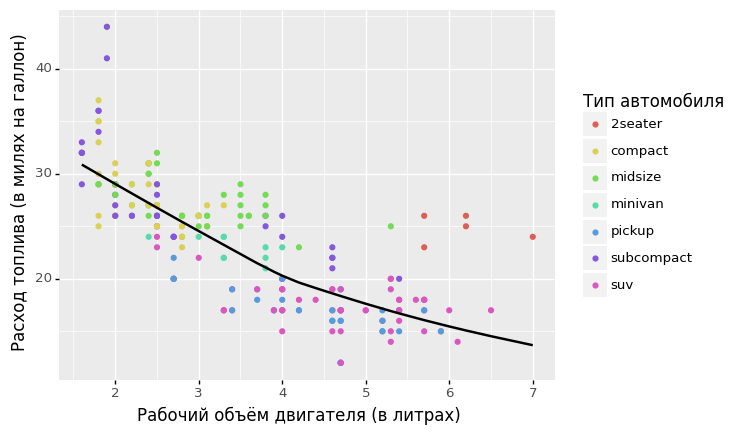

<ggplot: (185358162166)>

In [5]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
labs(x="Рабочий объём двигателя (в литрах)",
     y="Расход топлива (в милях на галлон)",
     colour="Тип автомобиля")

## Можно даже добавить математическое выражение вместо текстовых строк с помощью LaTeX:

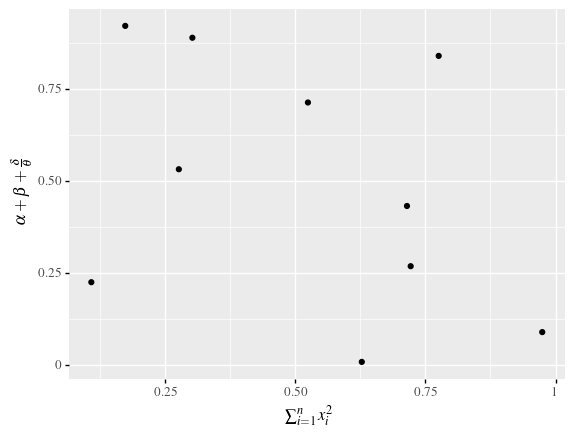

<ggplot: (185358061786)>

In [6]:
from matplotlib import rc
rc('text', usetex=True)

df = pd.DataFrame({"x": np.random.uniform(size=10),
                   "y": np.random.uniform(size=10)})

ggplot(df, aes("x", "y")) +\
geom_point() +\
labs(x="$\\sum_{i = 1}^n{x_i^2}$",
     y="$\\alpha + \\beta + \\frac{\\delta}{\\theta}$")

## Не забудьте потом отключить эту опцию.

In [7]:
rc('text', usetex=False)

### Создайте график на основе датафрейма mpg с заданными вручную заголовком, и осями x и y.

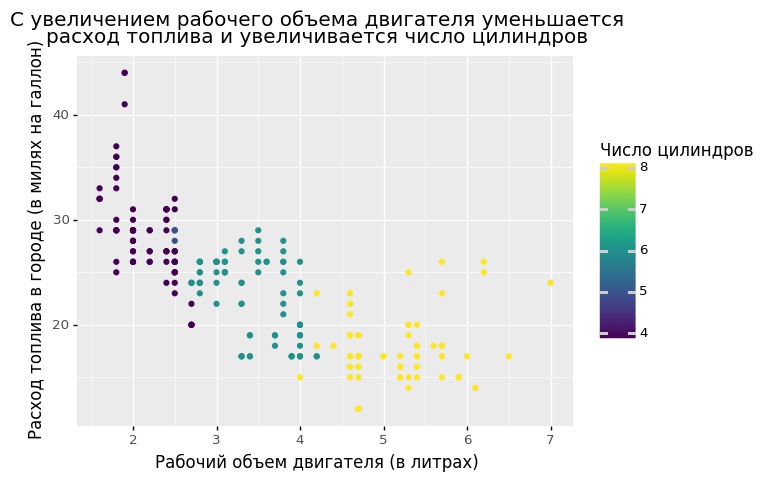

<ggplot: (-9223371851496606334)>

In [8]:
ggplot(data=mpg) + \
    geom_point(mapping=aes(y="hwy", x="displ", color="cyl")) + \
    labs(y="Расход топлива в городе (в милях на галлон)",
         x="Рабочий объем двигателя (в литрах)",
         colour="Число цилиндров",
         title="С увеличением рабочего объема двигателя уменьшается\nрасход топлива и увеличивается число цилиндров")

### Для одного из графиков, сформированных в прошлой лабораторной по собственным данным, придумайте название и подписи к осям.

c:\Users\Dmitry\anaconda3\envs\data-visualization\lib\site-packages\plotnine\layer.py:381: PlotnineWarning: position_stack : Removed 568 rows containing missing values.


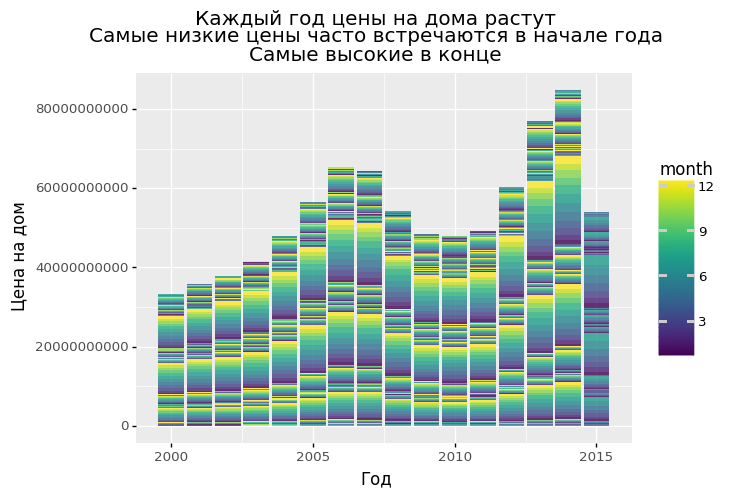

<ggplot: (185358458509)>

In [9]:
ggplot(data=txhousing) +\
    geom_col(mapping=aes(x="year", y="volume", fill="month"), alpha=4/5) +\
    labs(
        x="Год",
        y="Цена на дом",
        colour="Месяц",
        title="Каждый год цены на дома растут\nСамые низкие цены часто встречаются в начале года\nСамые высокие в конце",
    )

## Кроме основных элементов графика, можно подписывать и отдельные наблюдения. Сначала попробуем использовать geom_text(). У него все те же свойства, что у geom_point(), но добавляется свойство label.
## В качестве источника данных создадим датафрейм, в который поместим самую эффективную по расходу топлива марку автомобиля для каждого класса.

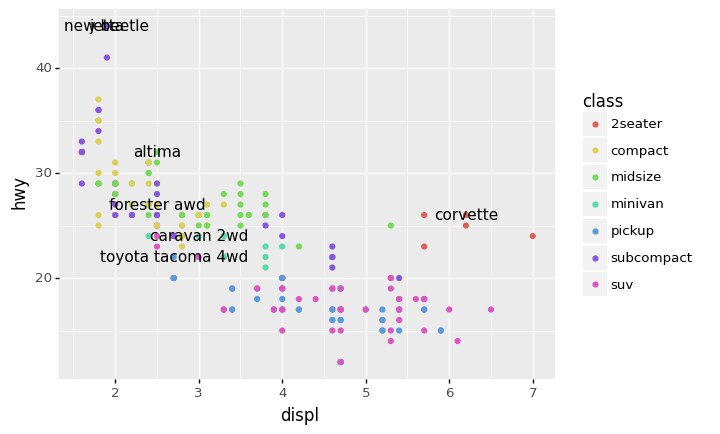

<ggplot: (-9223371851496097739)>

In [10]:
best_in_class = mpg\
.sort_values(by="hwy", ascending=False)\
.groupby("class")\
.first()

ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_text(aes(label="model"), data=best_in_class)

## Выглядит не очень. Текст перекрывает как сам себя, так и точки. Немного улучшить ситуацию можно заменив geom_text() на geom_label(), заодно добавив прозрачности и небольшой сдвиг по y.

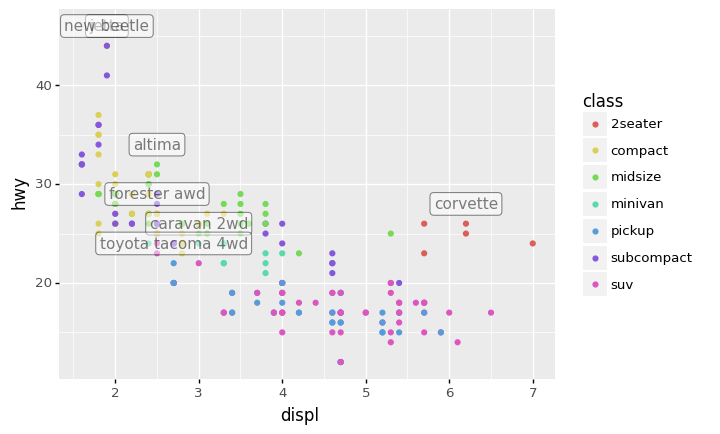

<ggplot: (-9223371851496099801)>

In [11]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_label(aes(label="model"), data=best_in_class, nudge_y=2, alpha=0.5)

## Стало лучше, но в верхнем левом углу надписи всё ещё перекрывают друг друга. Устранить это перекрытие, используя одинаковое смещение для всех текстовых блоков, не получится. К счастью, есть переменная adjust_text.

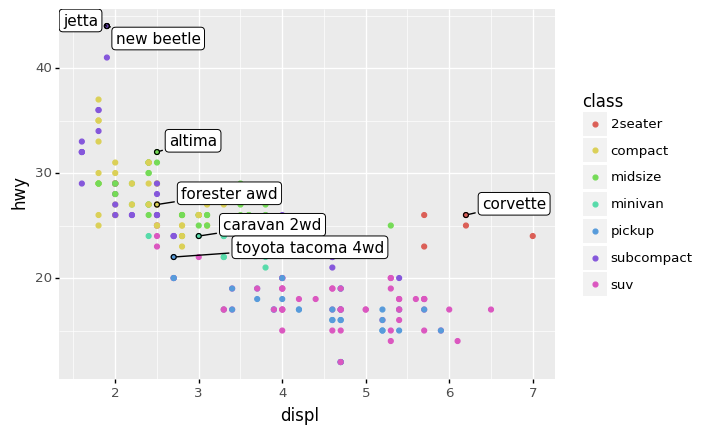

<ggplot: (185358672609)>

In [12]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_point(data=best_in_class, fill='none') +\
geom_label(aes(label="model"), data=best_in_class, adjust_text={
    'expand_points': (1.5, 1.5),
    'arrowprops': {
        'arrowstyle': '-'
    }})

## Обратите внимание, что мы нарисовали большие чёрные точки поверх выделенных.

## Вместо легенды иногда можно использовать тот же приём. Это не очень приятно выглядит на конкретном графике, но вообще может быть полезным.

c:\Users\Dmitry\anaconda3\envs\data-visualization\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


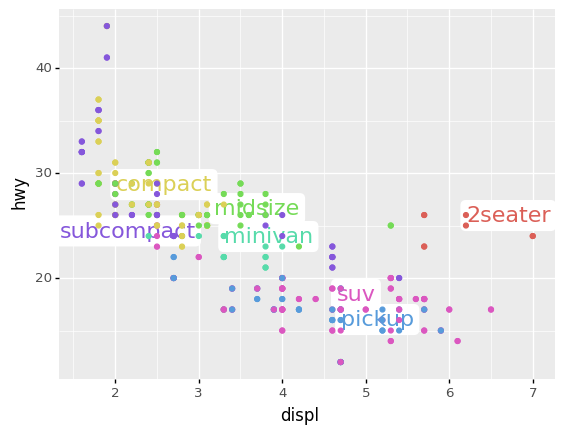

<ggplot: (-9223371851495920980)>

In [13]:
class_avg = mpg\
.groupby("class")["displ","hwy"].median()\
.reset_index()

ggplot(mpg, aes("displ", "hwy", colour="class")) +\
geom_point() +\
geom_label(aes(label="class"), data=class_avg, size=16, label_size=0, adjust_text={'expand_points': (0, 0)}) +\
geom_point() +\
theme(legend_position="none")

## На график можно добавить и простой фрагмент текста. Но для этого всё равно нужен будет DataFrame. 

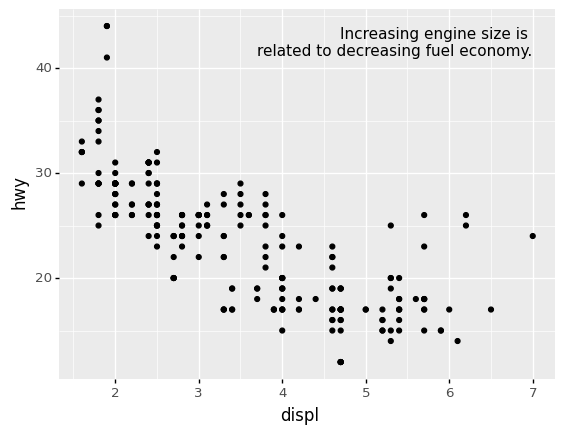

<ggplot: (185359881238)>

In [14]:
label = pd.DataFrame({"displ": [mpg.displ.max()],
                      "hwy": [mpg.hwy.max()],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Чтобы поместить текст в самый край нужно будет использовтаь `+np.Inf` и `-np.Inf`:

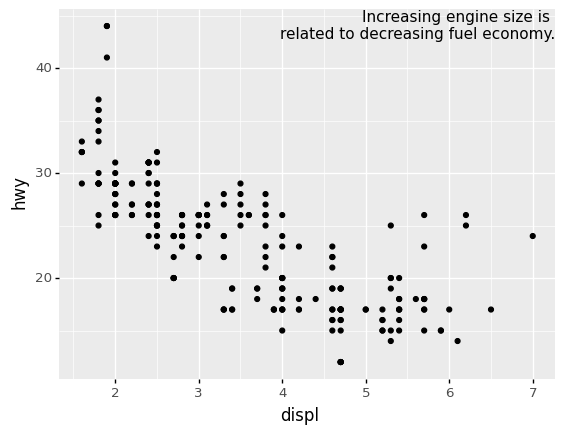

<ggplot: (185359917113)>

In [15]:
label = pd.DataFrame({"displ": [np.Inf],
                      "hwy": [np.Inf],
                      "label": "Increasing engine size is \nrelated to decreasing fuel economy."})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right")

## Во всех этих примерах перенос слов между строками производился вручную с использованием `"\n"`. Можно использовать функцию `fill` из модуля `textwrap`.

In [16]:
from textwrap import fill

print(fill("Increasing engine size is related to decreasing fuel economy.", width=40))

Increasing engine size is related to
decreasing fuel economy.


## Параметры `ha` и `va` определяют местоположение текста. Все девять вариантов – ниже.

In [105]:
from itertools import product

has = ["left", "center", "right"]
vas = ["top", "center", "bottom"]
xs = [0, 0.5, 1]
ys = [1, 0.5, 0]

df = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(3), repeat=2)])
df

,x,y,ha,va,label
0,0.0,1.0,left,top,"ha=""left""\nva=""top"""
1,0.0,0.5,left,center,"ha=""left""\nva=""center"""
2,0.0,0.0,left,bottom,"ha=""left""\nva=""bottom"""
3,0.5,1.0,center,top,"ha=""center""\nva=""top"""
4,0.5,0.5,center,center,"ha=""center""\nva=""center"""
5,0.5,0.0,center,bottom,"ha=""center""\nva=""bottom"""
6,1.0,1.0,right,top,"ha=""right""\nva=""top"""
7,1.0,0.5,right,center,"ha=""right""\nva=""center"""
8,1.0,0.0,right,bottom,"ha=""right""\nva=""bottom"""


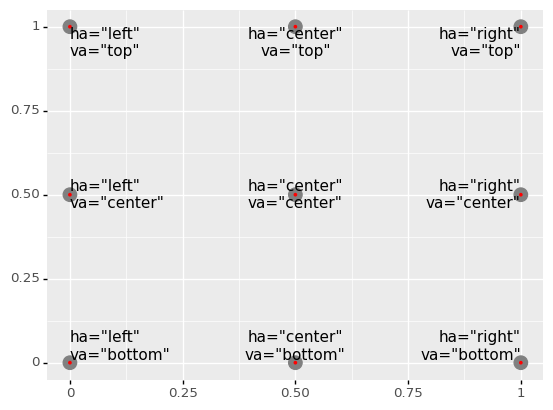

<ggplot: (-9223371851496275305)>

In [17]:
ggplot(df, aes("x", "y")) +\
geom_point(colour="grey", size=5) +\
geom_point(size=0.5, colour="red") +\
geom_text(aes(label="label", ha="ha", va="va")) +\
labs(x=None, y=None)

### Используйте `geom_text()` с положением в бесконечности, чтобы поместить текст в каждый из четырёх углов графика

In [137]:
np.random.rand(1,4)[0]

array([0.35646791, 0.27659956, 0.62604156, 0.80542982])

In [159]:
has = ["left", "right"]
vas = ["top", "bottom"]
xs = [-np.Inf, np.Inf]
ys = [np.Inf, -np.Inf]

label = pd.DataFrame([{"x": xs[x],
                    "y": ys[y],
                    "ha": has[x],
                    "va": vas[y],
                    "label": f"ha=\"{has[x]}\"\nva=\"{vas[y]}\""}
                   for x, y in product(range(2), repeat=2)])
label

,x,y,ha,va,label
0,-inf,inf,left,top,"ha=""left""\nva=""top"""
1,-inf,-inf,left,bottom,"ha=""left""\nva=""bottom"""
2,inf,inf,right,top,"ha=""right""\nva=""top"""
3,inf,-inf,right,bottom,"ha=""right""\nva=""bottom"""


In [160]:
data = pd.DataFrame()
data["x"] = np.random.rand(1,100)[0]
data["y"] = np.random.rand(1,100)[0]
data.head()

,x,y
0,0.473381,0.804234
1,0.286284,0.666965
2,0.196925,0.867893
3,0.902330,0.926809
4,0.682517,0.585690


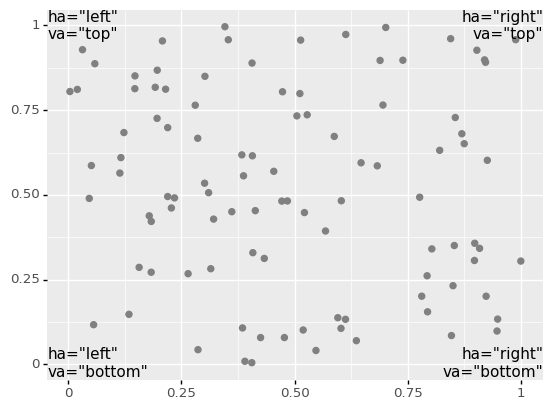

<ggplot: (-9223371851495911694)>

In [161]:
ggplot(data, aes("x", "y")) +\
geom_point(colour="grey", size=2) +\
geom_text(aes(label="label", ha="ha", va="va"), data=label) +\
labs(x=None, y=None)

### Поэкспериментируйте, как `geom_text()` работает с панелями. Сможете добавить подпись в одну выбранную панель?

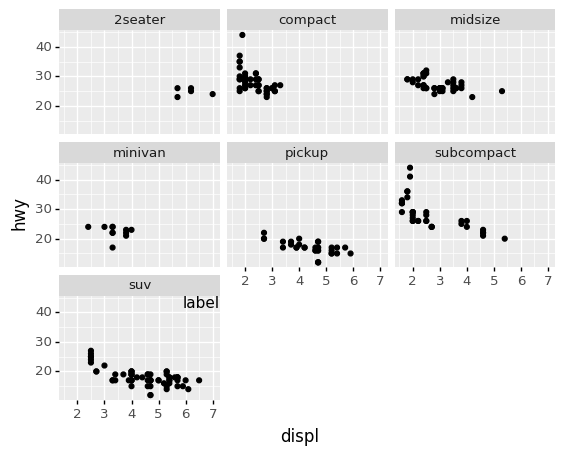

<ggplot: (-9223371851493463215)>

In [162]:
label = pd.DataFrame({
    "displ": [np.Inf],
    "hwy": [np.Inf],
    "label": "label",
    "class": "suv",
})

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_text(aes(label="label"), data=label, va="top", ha="right") +\
facet_wrap("class") 

### Используйте `geom_hline()` или `geom_vline()` для обозначения пороговых значений.

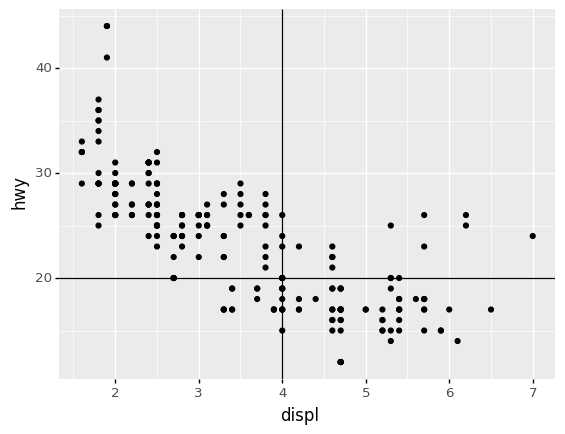

<ggplot: (-9223371851493533787)>

In [164]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_vline(xintercept=4)+\
geom_hline(yintercept=20)

### Используйте `geom_rect()`, чтобы нарисовать область интереса на графике.

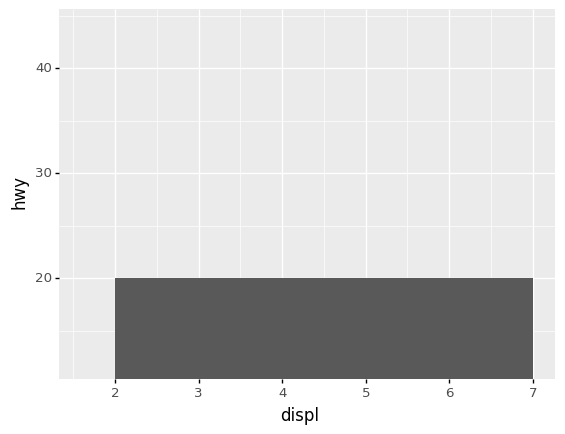

<ggplot: (185361351919)>

In [168]:
ggplot(mpg, aes("displ", "hwy")) + geom_rect(ymin=0, ymax=20, xmax=7, xmin=2)

### Используйте `geom_segment()`, чтобы нарисовать стрелку на графике.

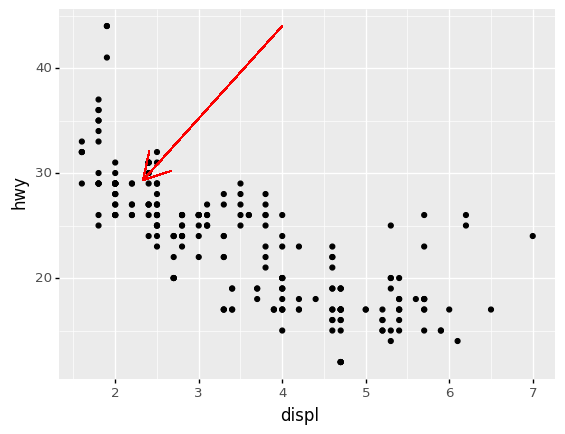

<ggplot: (185358535814)>

In [175]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
geom_segment(x=4, xend=max(mpg.displ) / 3, y=max(mpg.hwy), yend=max(mpg.hwy) / 1.5, 
             linetype = "solid", lineend = "round", color = "red", arrow = arrow(length = 0.3))


## Ещё один способ улучшить понятность графиков – выбрать правильные масштабы осей.
## Обратите внимание на разницу между `breaks` и `labels`. Первые – это засечки на осях, а вторые – подписи у этих засечек.

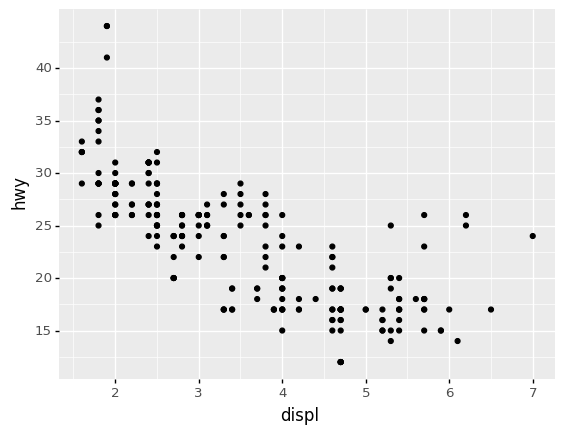

<ggplot: (185359641913)>

In [176]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_y_continuous(breaks=range(15, 45, 5))

## Можно, например, передать в качестве 'labels' список пустых строк нужного размера.

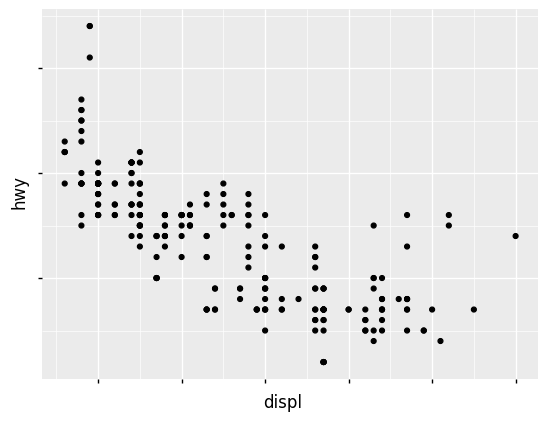

<ggplot: (-9223371851495232452)>

In [177]:
def no_labels(values):
    return [""] * len(values)

ggplot(mpg, aes("displ", "hwy")) +\
geom_point() +\
scale_x_continuous(labels=no_labels) +\
scale_y_continuous(labels=no_labels)

## Можно использовать `breaks` в случае, когда у вас мало конкретных значений, и вам хочется акцентировать внимание именно на них.

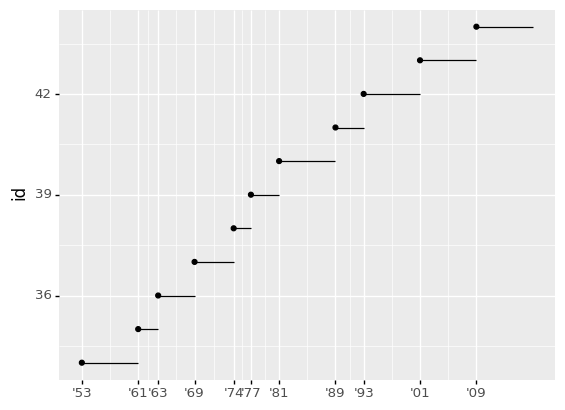

<ggplot: (185359714389)>

In [178]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_x_date(name="", breaks=presidential.start, date_labels="'%y")

## Местоположение легенды. В целом, всё тривиально.

In [179]:
base = ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class"))

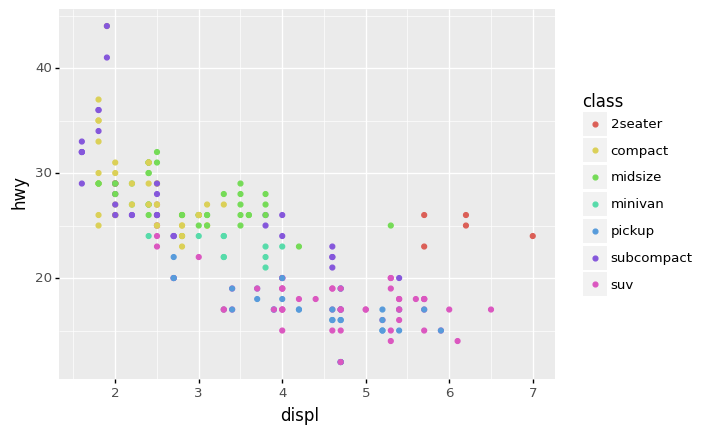

<ggplot: (-9223371851495074311)>

In [180]:
base + theme(legend_position="right")

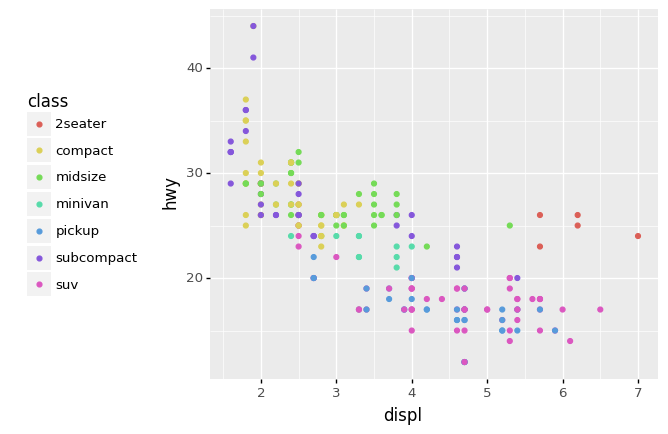

<ggplot: (185361219532)>

In [181]:
base + theme(subplots_adjust={'left': 0.2}) + theme(legend_position=(0, 0.5))

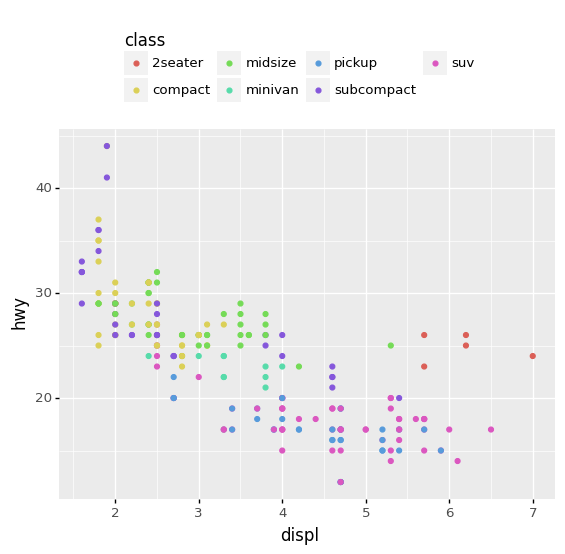

<ggplot: (185358547292)>

In [182]:
base + theme(legend_position="top")

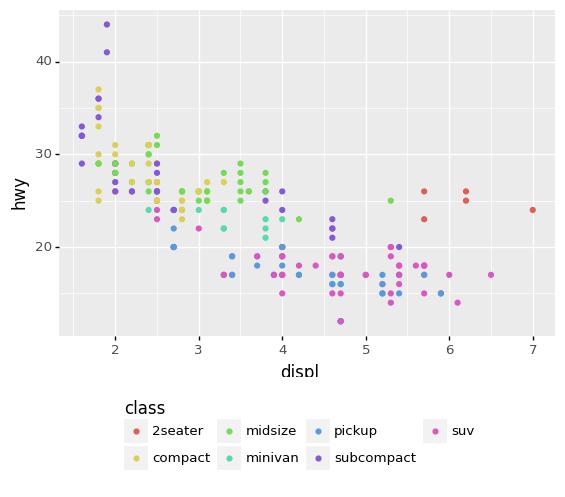

<ggplot: (185358081021)>

In [183]:
base + theme(subplots_adjust={'bottom': 0.2}, legend_position=(.5, 0), legend_direction='horizontal')

## Можно вообще убрать легенду с помощью `legend_position="none"`.

### С использованием `guides` можно настроить вид легенды ещё более детально.

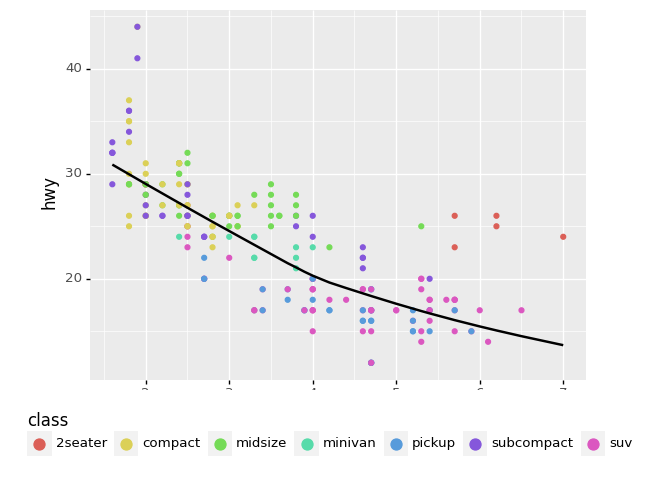

<ggplot: (-9223371851493293529)>

In [184]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(colour="class")) +\
geom_smooth(se=False) +\
theme(legend_position="bottom") +\
guides(colour=guide_legend(nrow=1, override_aes={"size": 4}))

## Масштаб и шкала осей

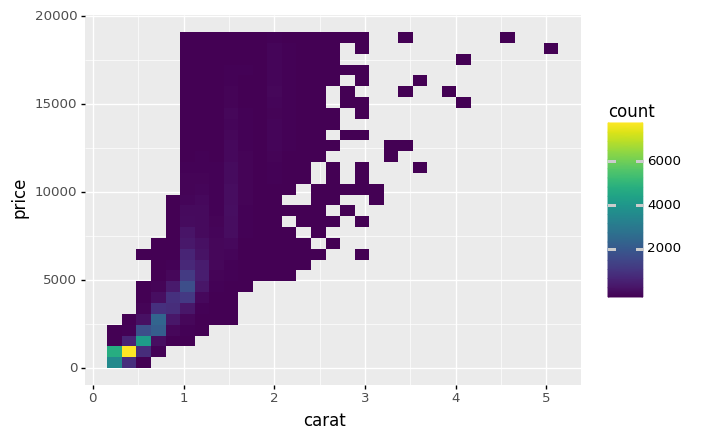

<ggplot: (-9223371851495479152)>

In [185]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d()

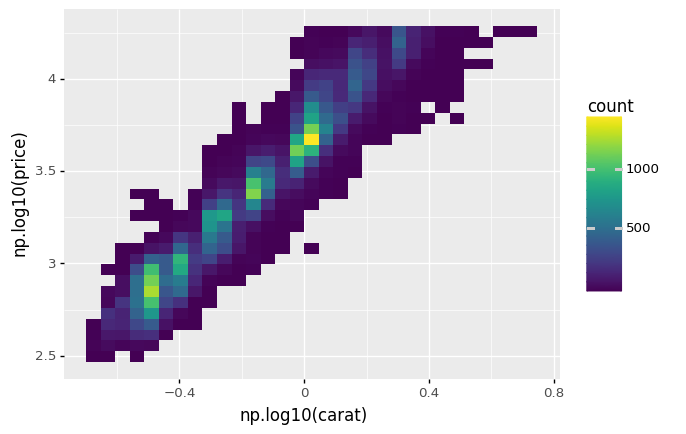

<ggplot: (185359917218)>

In [186]:
ggplot(diamonds, aes("np.log10(carat)", "np.log10(price)")) +\
geom_bin2d()

## Чтобы значения на осях остались исходными можно воспользоваться переопределением осей: `scale_x_log10()` и `scale_y_log10()`.

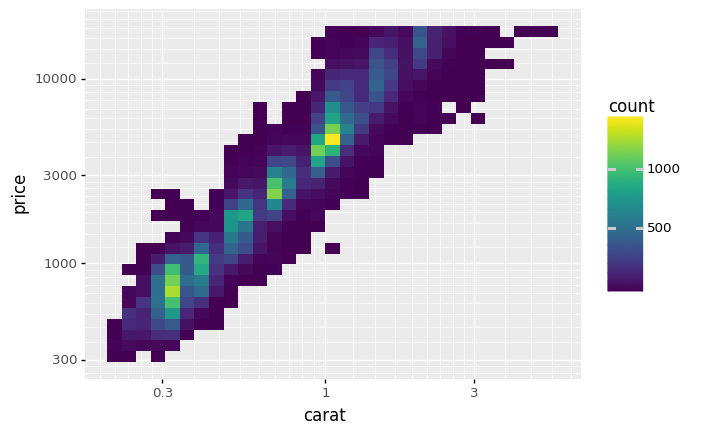

<ggplot: (185358525199)>

In [187]:
ggplot(diamonds, aes("carat", "price")) +\
geom_bin2d() +\
scale_x_log10() +\
scale_y_log10()

## Также часто переопределяют значения цветов.
## Вот так график выглядит по умолчанию

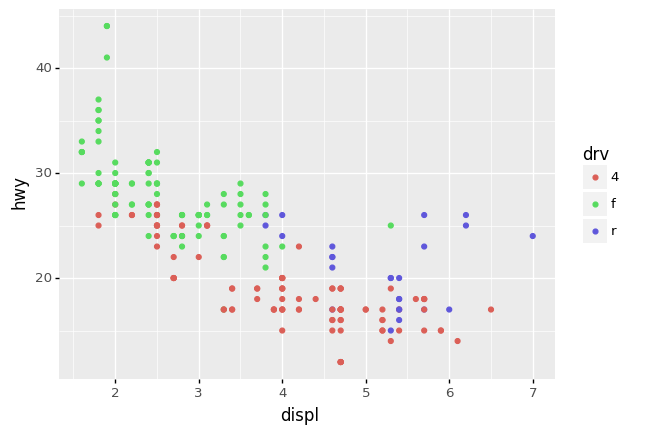

<ggplot: (185358644947)>

In [188]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv"))

## А так для `palette="Set1"`

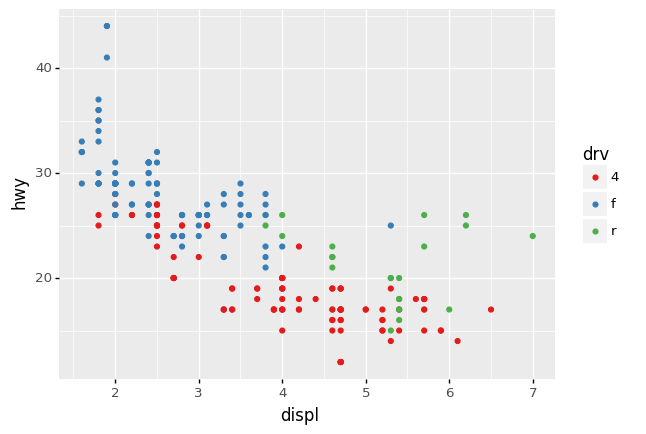

<ggplot: (-9223371851496280625)>

In [189]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## А чтобы было ещё более заметно разницу, можно добавить другую форму.

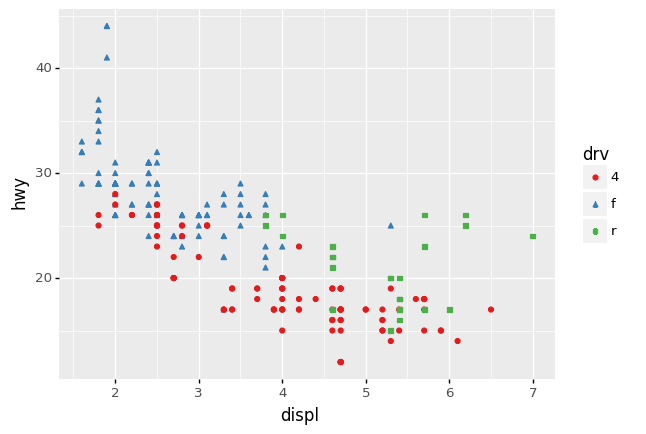

<ggplot: (185359040190)>

In [190]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="drv", shape="drv")) +\
scale_colour_brewer(type="qual", palette="Set1")

## Подробнее цветовые схемы описаны тут: <http://colorbrewer2.org/>.

## А ещё можно задать цвета вручную: `scale_colour_manual()`.

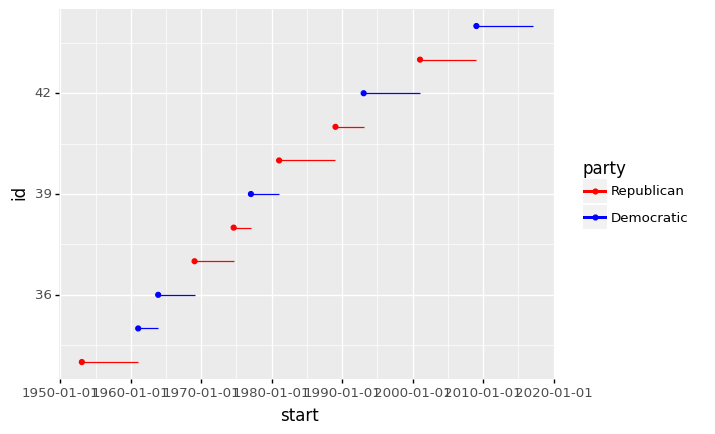

<ggplot: (-9223371851496075064)>

In [191]:
presidential["id"] = 34 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["red", "blue"], limits=["Republican", "Democratic"])

### "Ну поиграйте с цветами, вы же дизайнер"

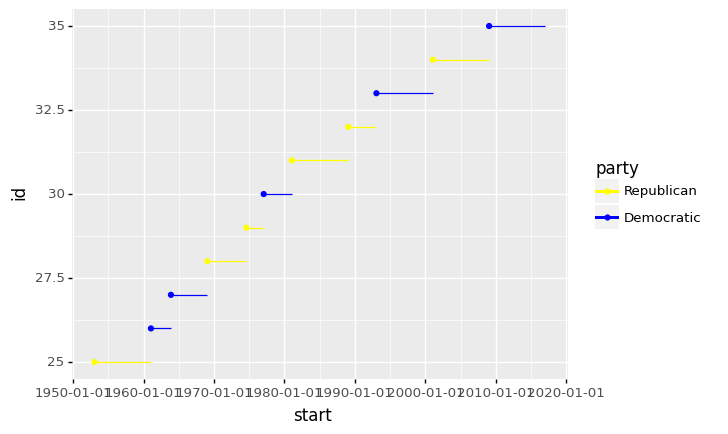

<ggplot: (185358908557)>

In [193]:
presidential["id"] = 25 + presidential.index

ggplot(presidential, aes("start", "id", colour="party")) +\
geom_point() +\
geom_segment(aes(xend="end", yend="id")) +\
scale_colour_manual(values=["yellow", "blue"], limits=["Republican", "Democratic"])

## Иногда результат зависит от пределов значений на графике

c:\Users\Dmitry\anaconda3\envs\data-visualization\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


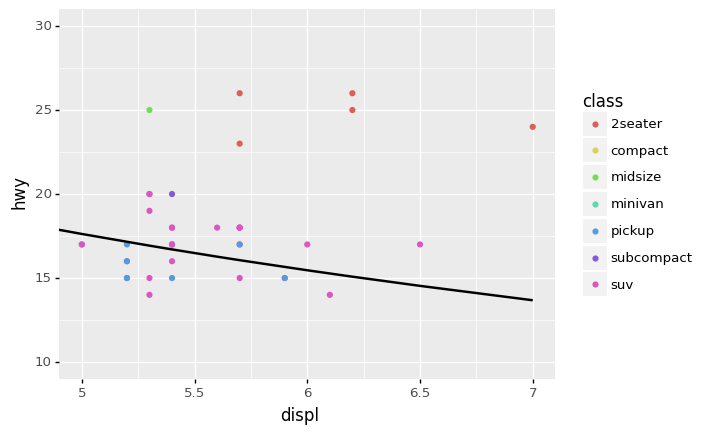

<ggplot: (185359260399)>

In [194]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth() +\
coord_cartesian(xlim=(5, 7), ylim=(10, 30))

c:\Users\Dmitry\anaconda3\envs\data-visualization\lib\site-packages\plotnine\stats\smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


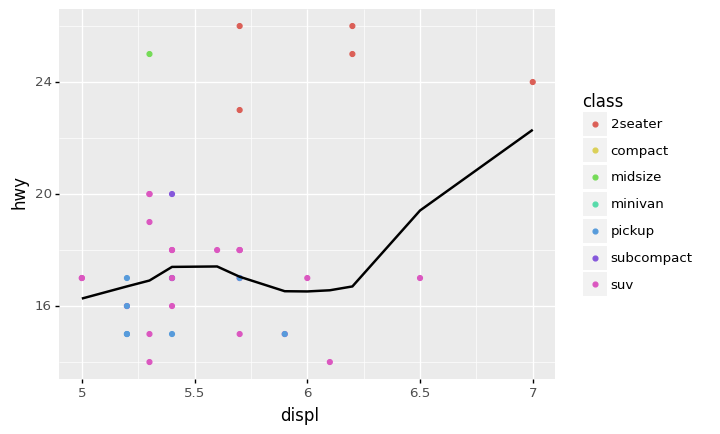

<ggplot: (185359815944)>

In [195]:
ggplot(mpg.query("5 <= displ <= 7 and 10 <= hwy <= 30"), aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth()

## Когда вы хотите сравнить значения двух графиков с совпадающими осями x и y, имеет смысл зафиксировать макмимальные и минимальные значения на этих осях.

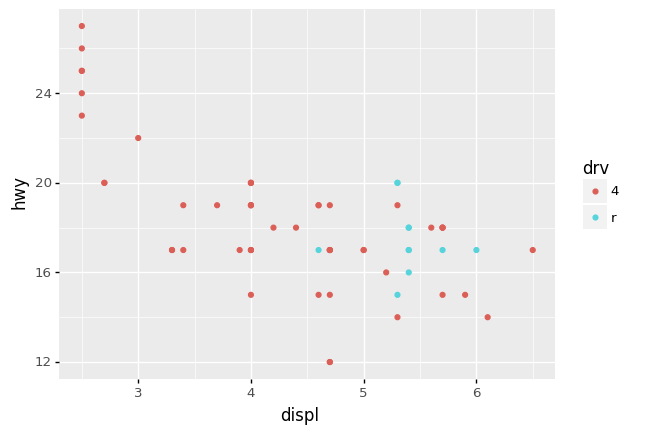

<ggplot: (185359850076)>

In [196]:
mpg["drv"] = mpg["drv"].astype(str)
suv = mpg[mpg["class"] == "suv"]
compact = mpg[mpg["class"] == "compact"]

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point()

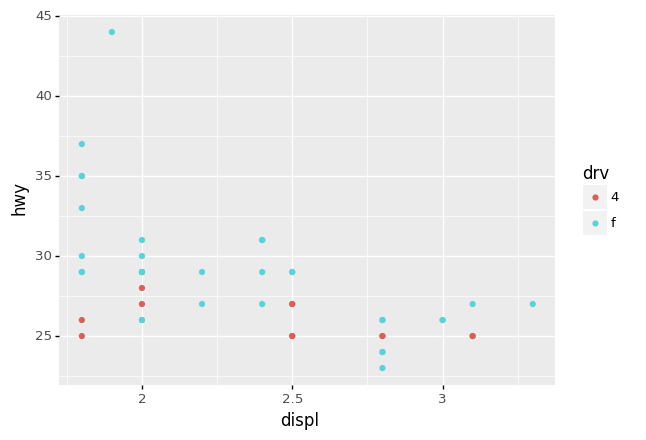

<ggplot: (-9223371851496372704)>

In [197]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point()

## Например, сохранив эти значения в одельную переменную.

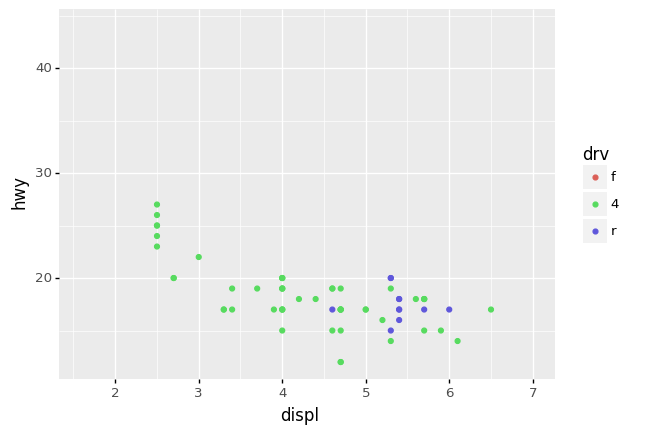

<ggplot: (-9223371851496198526)>

In [198]:
x_scale = scale_x_continuous(limits=(mpg.displ.min(), mpg.displ.max()))
y_scale = scale_y_continuous(limits=(mpg.hwy.min(), mpg.hwy.max()))
col_scale = scale_colour_discrete(limits=mpg.drv.unique())

ggplot(suv, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

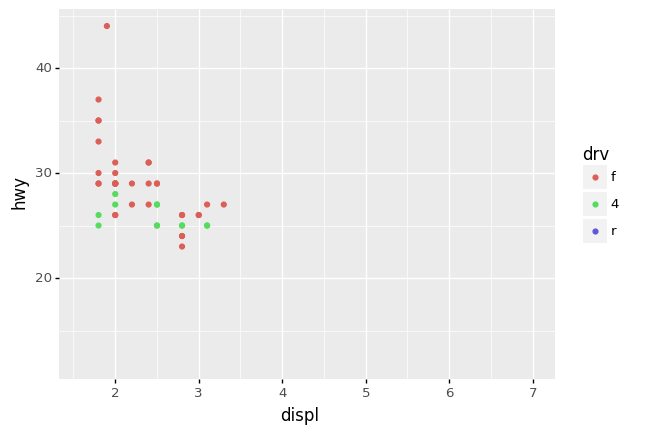

<ggplot: (-9223371851489551118)>

In [199]:
ggplot(compact, aes("displ", "hwy", colour="drv")) +\
geom_point() +\
x_scale +\
y_scale +\
col_scale

## Внешний вид можно менять настройкой тем

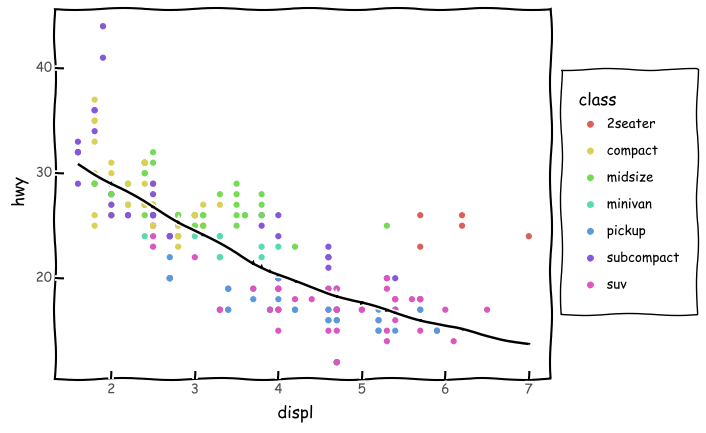

<ggplot: (-9223371851495012222)>

In [200]:
ggplot(mpg, aes("displ", "hwy")) +\
geom_point(aes(color="class")) +\
geom_smooth(se=False) +\
theme_xkcd()

## 

## Сохранить последний нарисованный график можно с использованием:
## `_.save("my-plot.pdf")`
## В качестве настроек используются: `width`, `height`, `units`, и `dpi`. 

## Если кто-то в предыдущей лабораторной не сделал творческое задание – самое время это сделать. Кто сделал – тот молодец!